<a href="https://colab.research.google.com/github/jpsn2/Projeto_Aprendizagem_de_Maquina_2025_2/blob/main/notebooks/decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Imports

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Leitura do dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset_project_AM/yeast.data',
        sep=' ',
        engine="python",    # necessário para autodetectar separador
        comment="#",        # ignora linhas que começam com #
        header=None,        # caso não haja cabeçalho
        encoding="utf-8",   # padrão moderno
        on_bad_lines="skip" # ignora linhas com problemas
    )

try:
    print(df.head())
except Exception as e:
    print("Erro ao ler arquivo:", e)

           0   1     2   3     4   5     6   7     8   9    10  11   12  13  \
0  ADT1_YEAST NaN  0.58 NaN  0.61 NaN  0.47 NaN  0.13 NaN  0.5 NaN  0.0 NaN   
1  ADT2_YEAST NaN  0.43 NaN  0.67 NaN  0.48 NaN  0.27 NaN  0.5 NaN  0.0 NaN   
2  ADT3_YEAST NaN  0.64 NaN  0.62 NaN  0.49 NaN  0.15 NaN  0.5 NaN  0.0 NaN   
3  AAR2_YEAST NaN  0.58 NaN  0.44 NaN  0.57 NaN  0.13 NaN  0.5 NaN  0.0 NaN   
4  AATM_YEAST NaN  0.42 NaN  0.44 NaN  0.48 NaN  0.54 NaN  0.5 NaN  0.0 NaN   

     14  15    16  17   18  
0  0.48 NaN  0.22 NaN  MIT  
1  0.53 NaN  0.22 NaN  MIT  
2  0.53 NaN  0.22 NaN  MIT  
3  0.54 NaN  0.22 NaN  NUC  
4  0.48 NaN  0.22 NaN  MIT  


## Verificação da quantidade de linhas e colunas

In [4]:
df.shape

(1418, 19)

## Drop de colunas com valores NaN

In [5]:
df = df.dropna(axis=1, how='all')

In [6]:
df.head()

,0,2,4,6,8,10,12,14,16,18
0,ADT1_YEAST,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,ADT2_YEAST,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,ADT3_YEAST,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,AAR2_YEAST,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,AATM_YEAST,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


## Renomeando as colunas, e retirando as antigas sem nome

In [7]:
df['mcg'] = df[2]
df['gvh'] = df[4]
df['alm'] = df[6]
df['mit'] = df[8]
df['erl'] = df[10]
df['pox'] = df[12]
df['vac'] = df[14]
df['nuc'] = df[16]
df['Localization site'] = df[18]

In [8]:
df = df.drop(columns=[0])
df = df.drop(columns=[2])
df = df.drop(columns=[4])
df = df.drop(columns=[6])
df = df.drop(columns=[8])
df = df.drop(columns=[10])
df = df.drop(columns=[12])
df = df.drop(columns=[14])
df = df.drop(columns=[16])
df = df.drop(columns=[18])

In [9]:
df.head()

,mcg,gvh,alm,mit,erl,pox,vac,nuc,Localization site
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22,MIT
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,MIT
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,MIT
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,NUC
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,MIT


In [10]:
df.shape

(1418, 9)

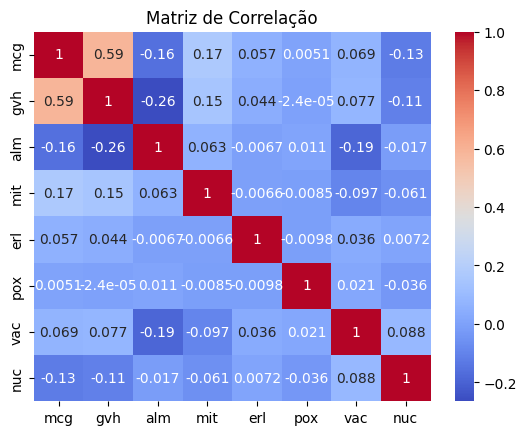

In [11]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [12]:
X = df.drop(columns=['Localization site'])
y = df['Localization site']

In [13]:
X

,mcg,gvh,alm,mit,erl,pox,vac,nuc
0,0.58,0.61,0.47,0.13,0.5,0.0,0.48,0.22
1,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22
2,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22
3,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22
4,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22
...,...,...,...,...,...,...,...,...
1413,0.81,0.62,0.43,0.17,0.5,0.0,0.53,0.22
1414,0.47,0.43,0.61,0.40,0.5,0.0,0.48,0.47
1415,0.67,0.57,0.36,0.19,0.5,0.0,0.56,0.22
1416,0.43,0.40,0.60,0.16,0.5,0.0,0.53,0.39


In [14]:
y

,Localization site
0,MIT
1,MIT
2,MIT
3,NUC
4,MIT
...,...
1413,ME2
1414,NUC
1415,ME2
1416,NUC


In [15]:
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)
X_test.to_numpy()
y_test.to_numpy()

array(['ME3', 'CYT', 'NUC', 'NUC', 'ME3', 'NUC', 'CYT', 'NUC', 'NUC',
       'CYT', 'ME3', 'MIT', 'NUC', 'MIT', 'EXC', 'NUC', 'NUC', 'NUC',
       'MIT', 'NUC', 'MIT', 'MIT', 'NUC', 'MIT', 'CYT', 'MIT', 'NUC',
       'ME2', 'NUC', 'POX', 'ME3', 'MIT', 'ME1', 'CYT', 'CYT', 'MIT',
       'ME3', 'NUC', 'NUC', 'CYT', 'NUC', 'NUC', 'ME1', 'NUC', 'CYT',
       'CYT', 'CYT', 'MIT', 'NUC', 'ME3', 'NUC', 'NUC', 'NUC', 'MIT',
       'NUC', 'NUC', 'NUC', 'NUC', 'ME1', 'CYT', 'NUC', 'CYT', 'NUC',
       'CYT', 'MIT', 'CYT', 'ME1', 'VAC', 'ME2', 'CYT', 'CYT', 'ME3',
       'MIT', 'CYT', 'MIT', 'NUC', 'CYT', 'NUC', 'ME3', 'CYT', 'CYT',
       'NUC', 'ME1', 'NUC', 'ME3', 'NUC', 'CYT', 'ME3', 'CYT', 'NUC',
       'ME1', 'NUC', 'CYT', 'NUC', 'EXC', 'CYT', 'ME2', 'MIT', 'NUC',
       'CYT', 'NUC', 'CYT', 'MIT', 'CYT', 'NUC', 'MIT', 'NUC', 'CYT',
       'ME3', 'CYT', 'CYT', 'MIT', 'POX', 'NUC', 'MIT', 'NUC', 'ME2',
       'CYT', 'CYT', 'NUC', 'ME2', 'ME3', 'CYT', 'MIT', 'NUC', 'CYT',
       'NUC', 'NUC',

In [16]:
y_temp.shape

(992,)

In [17]:
X_temp.shape

(992, 8)

In [18]:
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp,
    test_size=0.3,
    stratify=y_temp,
    random_state=42
)
X_train.to_numpy()
y_train.to_numpy()
X_val.to_numpy()
y_val.to_numpy()

array(['MIT', 'CYT', 'MIT', 'NUC', 'NUC', 'NUC', 'ME3', 'ME3', 'CYT',
       'NUC', 'NUC', 'MIT', 'NUC', 'CYT', 'MIT', 'ME3', 'NUC', 'CYT',
       'NUC', 'MIT', 'CYT', 'ME2', 'CYT', 'NUC', 'NUC', 'ME2', 'NUC',
       'NUC', 'MIT', 'ME1', 'ME2', 'CYT', 'ME3', 'CYT', 'NUC', 'CYT',
       'MIT', 'NUC', 'CYT', 'MIT', 'NUC', 'ME1', 'NUC', 'NUC', 'CYT',
       'NUC', 'CYT', 'ME3', 'ME2', 'NUC', 'CYT', 'MIT', 'CYT', 'ME2',
       'ME3', 'MIT', 'CYT', 'NUC', 'CYT', 'POX', 'CYT', 'CYT', 'EXC',
       'CYT', 'CYT', 'CYT', 'NUC', 'CYT', 'CYT', 'CYT', 'MIT', 'MIT',
       'ME3', 'MIT', 'CYT', 'CYT', 'ME3', 'MIT', 'CYT', 'CYT', 'CYT',
       'NUC', 'ME3', 'ME3', 'MIT', 'MIT', 'CYT', 'CYT', 'ME3', 'NUC',
       'CYT', 'POX', 'ME3', 'MIT', 'MIT', 'MIT', 'MIT', 'CYT', 'ME1',
       'ME3', 'NUC', 'NUC', 'CYT', 'NUC', 'NUC', 'MIT', 'MIT', 'CYT',
       'CYT', 'MIT', 'NUC', 'CYT', 'NUC', 'CYT', 'ME3', 'EXC', 'CYT',
       'NUC', 'NUC', 'NUC', 'ME3', 'NUC', 'ME3', 'NUC', 'CYT', 'ME3',
       'ME2', 'MIT',

In [26]:
clf = DecisionTreeClassifier(random_state=42, max_depth=5)

In [27]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [28]:
val_pred = clf.predict(X_val)

In [29]:
val_acc = clf.score(X_val, y_val)

In [30]:
print(f"Acurácia na validação: {val_acc:.3f}")

Acurácia na validação: 0.564
